<a href="https://colab.research.google.com/github/jeffheaton/app_deep_learning/blob/main/t81_558_class_01_4_python_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# T81-558: Applications of Deep Neural Networks

**Module 1: Python Preliminaries**

- Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
- For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).


# Module 1 Material

* Part 1.1: Course Overview [[Video]](https://www.youtube.com/watch?v=r7eExQWKzdc&list=PLjy4p-07OYzuy_lHcRW8lPTLPTTOmUpmi) [[Notebook]](t81_558_class_01_1_overview.ipynb)
* Part 1.2: Introduction to Python [[Video]](https://www.youtube.com/watch?v=ZAOOinw51no&list=PLjy4p-07OYzuy_lHcRW8lPTLPTTOmUpmi) [[Notebook]](t81_558_class_01_2_intro_python.ipynb)
* Part 1.3: Python Lists, Dictionaries, Sets and JSON [[Video]](https://www.youtube.com/watch?v=5jZWWLO71bE&list=PLjy4p-07OYzuy_lHcRW8lPTLPTTOmUpmi) [[Notebook]](t81_558_class_01_3_python_collections.ipynb)
* **Part 1.4: File Handling** [[Video]](https://www.youtube.com/watch?v=CPrp1Sm-AhQ&list=PLjy4p-07OYzuy_lHcRW8lPTLPTTOmUpmi) [[Notebook]](t81_558_class_01_4_python_files.ipynb)
* Part 1.5: Functions, Lambdas, and Map/Reduce [[Video]](https://www.youtube.com/watch?v=DEg8a22mtBs&list=PLjy4p-07OYzuy_lHcRW8lPTLPTTOmUpmi) [[Notebook]](t81_558_class_01_5_python_functional.ipynb)

# Google CoLab Instructions

The following code ensures that Google CoLab is running and maps Google Drive if needed. Running the following code will map your GDrive to `/content/drive`.


In [1]:
try:
    from google.colab import drive

    drive.mount("/content/drive", force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: not using Google CoLab


# Part 1.4: File Handling


Files often contain the data that you use to train your AI programs. Once trained, your models may use real-time data to form predictions. These predictions might be made on files too. Regardless of predicting or training, file processing is a vital skill for the AI practitioner.

There are many different types of files that you must process as an AI practitioner. Some of these file types are listed here:

- **CSV files** (generally have the .csv extension) hold tabular data that resembles spreadsheet data.
- **Image files** (generally with the .png or .jpg extension) hold images for computer vision.
- **Text files** (often have the .txt extension) hold unstructured text and are essential for natural language processing.
- **JSON** (often have the .json extension) contain semi-structured textual data in a human-readable text-based format.
- **H5** (can have a wide array of extensions) contain semi-structured textual data in a human-readable text-based format.
- **Numpy** (npy) PyTorch stores neural networks as Numpy files.
- **Audio Files** (often have an extension such as .au or .wav) contain recorded sound.

Data can come from a variety of sources. In this class, we obtain data from three primary locations:

- **Your Hard Drive** - This type of data is stored locally, and Python accesses it from a path that looks something like: **c:\data\myfile.csv or /Users/jheaton/data/myfile.csv**.
- **The Internet** - This type of data resides in the cloud, and Python accesses it from a URL that looks something like:
  https://data.heatonresearch.com/data/t81-558/iris.csv.
- **Google Drive (cloud)** - If your code in Google CoLab, you use GoogleDrive to save and load some data files. CoLab mounts your GoogleDrive into a path similar to the following: **/content/drive/My Drive/myfile.csv**.

## Read a CSV File

Python programs can read CSV files with Pandas. We will see more about Pandas in the next section, but for now, its general format is:


In [2]:
import pandas as pd

df = pd.read_csv("https://data.heatonresearch.com/data/t81-558/iris.csv")

The above command loads [Fisher's Iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) from the Internet. It might take a few seconds to load, so it is good to keep the loading code in a separate Jupyter notebook cell so that you do not have to reload it as you test your program. You can load Internet data, local hard drive, and Google Drive data this way.

Now that the data is loaded, you can display the first five rows with this command.


In [3]:
display(df[0:5])

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Read (stream) a Large CSV File

Pandas will read the entire CSV file into memory. Usually, this is fine. However, at times you may wish to "stream" a huge file. Streaming allows you to process this file one record at a time. Because the program does not load all of the data into memory, you can handle huge files. The following code loads the Iris dataset and calculates averages, one row at a time. This technique would work for large files.


In [4]:
import codecs
import csv
import urllib.request

import numpy as np

url = "https://data.heatonresearch.com/data/t81-558/iris.csv"
urlstream = urllib.request.urlopen(url)
csvfile = csv.reader(codecs.iterdecode(urlstream, "utf-8"))
next(csvfile)  # Skip header row
sum = np.zeros(4)
count = 0

for line in csvfile:
    # Convert each row to Numpy array
    line2 = np.array(line)[0:4].astype(float)

    # If the line is of the right length (skip empty lines), then add
    if len(line2) == 4:
        sum += line2
        count += 1

# Calculate the average, and print the average of the 4 iris
# measurements (features)
print(sum / count)

[5.84333333 3.05733333 3.758      1.19933333]


## Read a Text File

The following code reads the [Sonnet 18](https://en.wikipedia.org/wiki/Sonnet_18) by [William Shakespeare](https://en.wikipedia.org/wiki/William_Shakespeare) as a text file. This code streams the document and reads it line-by-line. This code could handle a huge file.


In [5]:
import codecs
import urllib.request

url = "https://data.heatonresearch.com/data/t81-558/datasets/sonnet_18.txt"
with urllib.request.urlopen(url) as urlstream:
    for line in codecs.iterdecode(urlstream, "utf-8"):
        print(line.rstrip())

Sonnet 18 original text
William Shakespeare

Shall I compare thee to a summer's day?
Thou art more lovely and more temperate:
Rough winds do shake the darling buds of May,
And summer's lease hath all too short a date:
Sometime too hot the eye of heaven shines,
And often is his gold complexion dimm'd;
And every fair from fair sometime declines,
By chance or nature's changing course untrimm'd;
But thy eternal summer shall not fade
Nor lose possession of that fair thou owest;
Nor shall Death brag thou wander'st in his shade,
When in eternal lines to time thou growest:
So long as men can breathe or eyes can see,
So long lives this and this gives life to thee.


## Read an Image

Computer vision is one of the areas that neural networks outshine other models. To support computer vision, the Python programmer needs to understand how to process images. For this course, we will use the Python PIL package for image processing. The following code demonstrates how to load an image from a URL and display it.


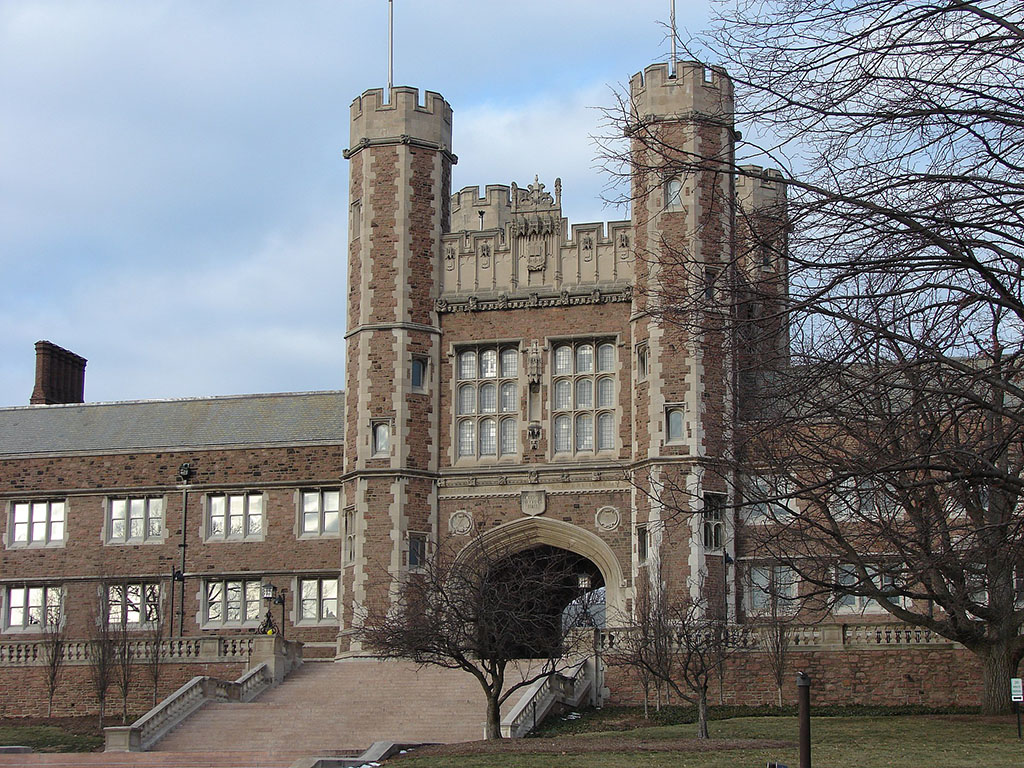

In [6]:
%matplotlib inline
from io import BytesIO

import requests
from PIL import Image

url = "https://data.heatonresearch.com/images/jupyter/brookings.jpeg"

response = requests.get(url)
img = Image.open(BytesIO(response.content))

img